In [2]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics

-0.06999999999999995 2.45
-1.0 135.72


([], [])

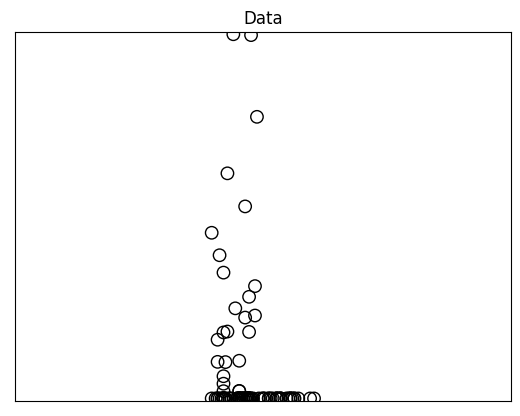

In [5]:
data = np.loadtxt('avocado.txt', delimiter=',', usecols=(0,7))

x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
print(x_min, x_max)
print(y_min, y_max)

plt.figure()
plt.scatter(data[:,0], data[:,1], marker='o', facecolors='none', edgecolors='black', s=80)
plt.title('Data')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

In [11]:
# define number of clusters
variant = 7
kmeans = KMeans(init='k-means++', n_clusters=variant, n_init=10)

kmeans.fit(data)
step_size = 0.01

x_vals, y_vals = np.meshgrid(np.arange(x_min, x_max, step_size), np.arange(y_min, y_max, step_size))
output = kmeans.predict(np.c_[x_vals.ravel(), y_vals.ravel()])
output = output.reshape(x_vals.shape)

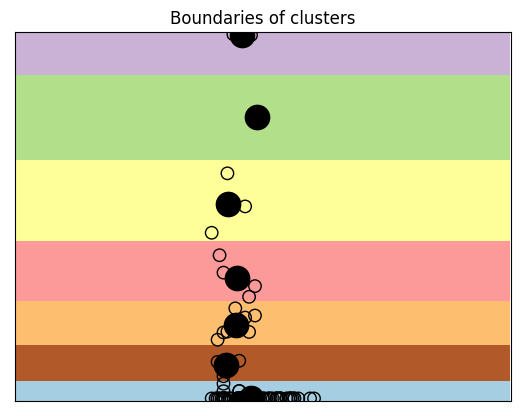

In [12]:
# define center of clusters
plt.figure()
plt.clf()

plt.imshow(
    output,
    interpolation='nearest',
    extent=(x_vals.min(), x_vals.max(), y_vals.min(), y_vals.max()),
    cmap=plt.cm.Paired,
    aspect='auto',
    origin='lower'
)

plt.scatter(
    data[:,0],
    data[:,1],
    marker='o',
    facecolors='none',
    edgecolors='black',
    s=80
)
cluster_centers = kmeans.cluster_centers_

plt.scatter(
    cluster_centers[:,0],
    cluster_centers[:,1],
    marker='o',
    s=210,
    linewidths=4,
    color='black',
    zorder=12,
    facecolors='black'
)

plt.title('Boundaries of clusters')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()